1. Анализ данных в Python

A. Загрузка и первичный обзор

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('google_books_dataset.csv')

# Первичный обзор
print("=== ПЕРВИЧНЫЙ ОБЗОР ДАННЫХ ===")
print(f"Размер датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}\n")

print("Первые 5 строк:")
print(df.head())
print("\nПоследние 5 строк:")
print(df.tail())

print("\nИнформация о структуре данных:")
print(df.info())

print("\nНазвания столбцов:")
print(df.columns.tolist())

# Проверка типов данных
print("\n=== ТИПЫ ДАННЫХ ===")
print(df.dtypes)

=== ПЕРВИЧНЫЙ ОБЗОР ДАННЫХ ===
Размер датасета: (15147, 21)
Количество строк: 15147
Количество столбцов: 21

Первые 5 строк:
        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Iv

B. Обработка данных

=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===
                Количество пропусков  Процент пропусков
title                              8           0.052816
subtitle                        9164          60.500429
authors                         3525          23.271935
publisher                       8057          53.192051
published_date                   214           1.412821
description                     6796          44.866970
page_count                       214           1.412821
categories                      2452          16.188024
average_rating                 14290          94.342114
isbn_13                         7764          51.257675
isbn_10                         8026          52.987390
list_price                     12204          80.570410
currency                       12204          80.570410
thumbnail                        669           4.416716


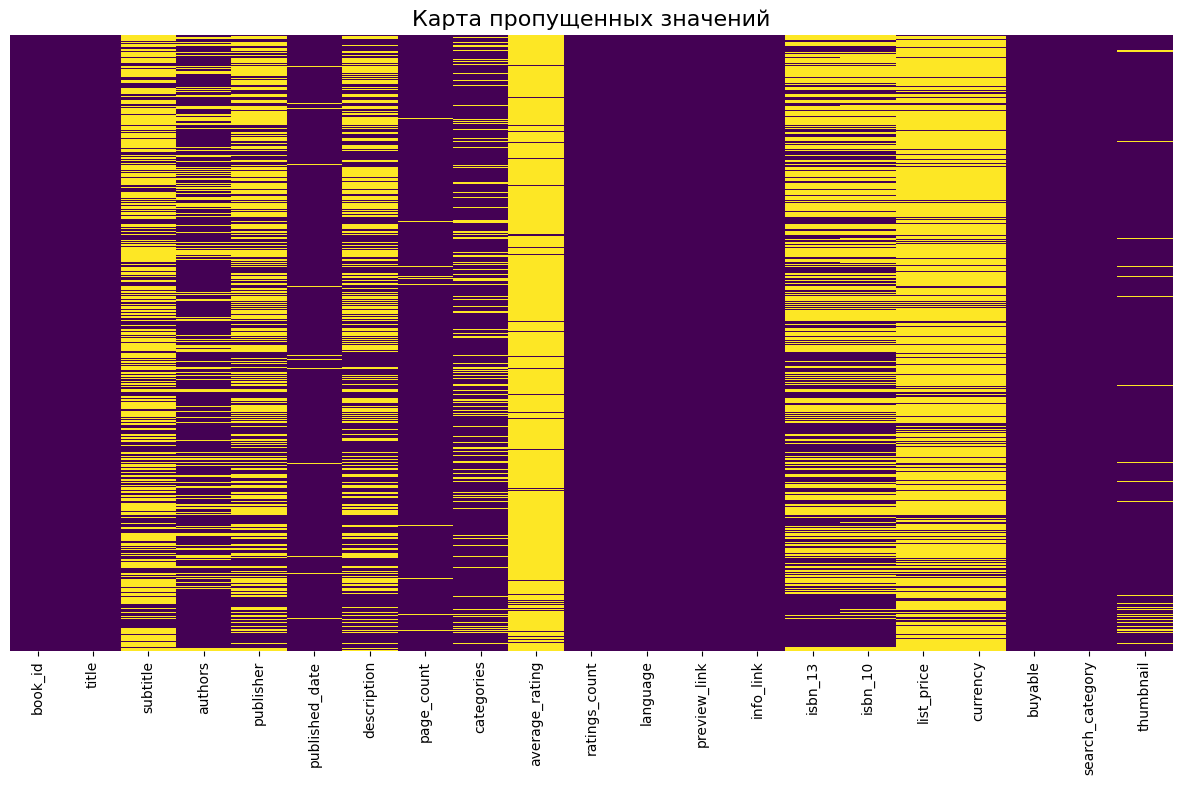


=== СТРАТЕГИЯ ОБРАБОТКИ ПРОПУСКОВ ===
Заполнен столбец 'page_count' медианой: 368.0
Заполнен столбец 'average_rating' медианой: 4.0
Заполнен столбец 'isbn_13' медианой: 9781430240426.0
Заполнен столбец 'list_price' медианой: 19.0
Заполнен столбец 'title'
Заполнен столбец 'subtitle'
Заполнен столбец 'authors'
Заполнен столбец 'publisher'
Заполнен столбец 'published_date'
Заполнен столбец 'description'
Заполнен столбец 'categories'
Заполнен столбец 'isbn_10'
Заполнен столбец 'currency'
Заполнен столбец 'thumbnail'

=== ДУБЛИКАТЫ ===
Количество полных дубликатов строк: 0
Полных дубликатов не найдено
Потенциальных дубликатов по title/authors/date: 194

=== ВЫБРОСЫ ===


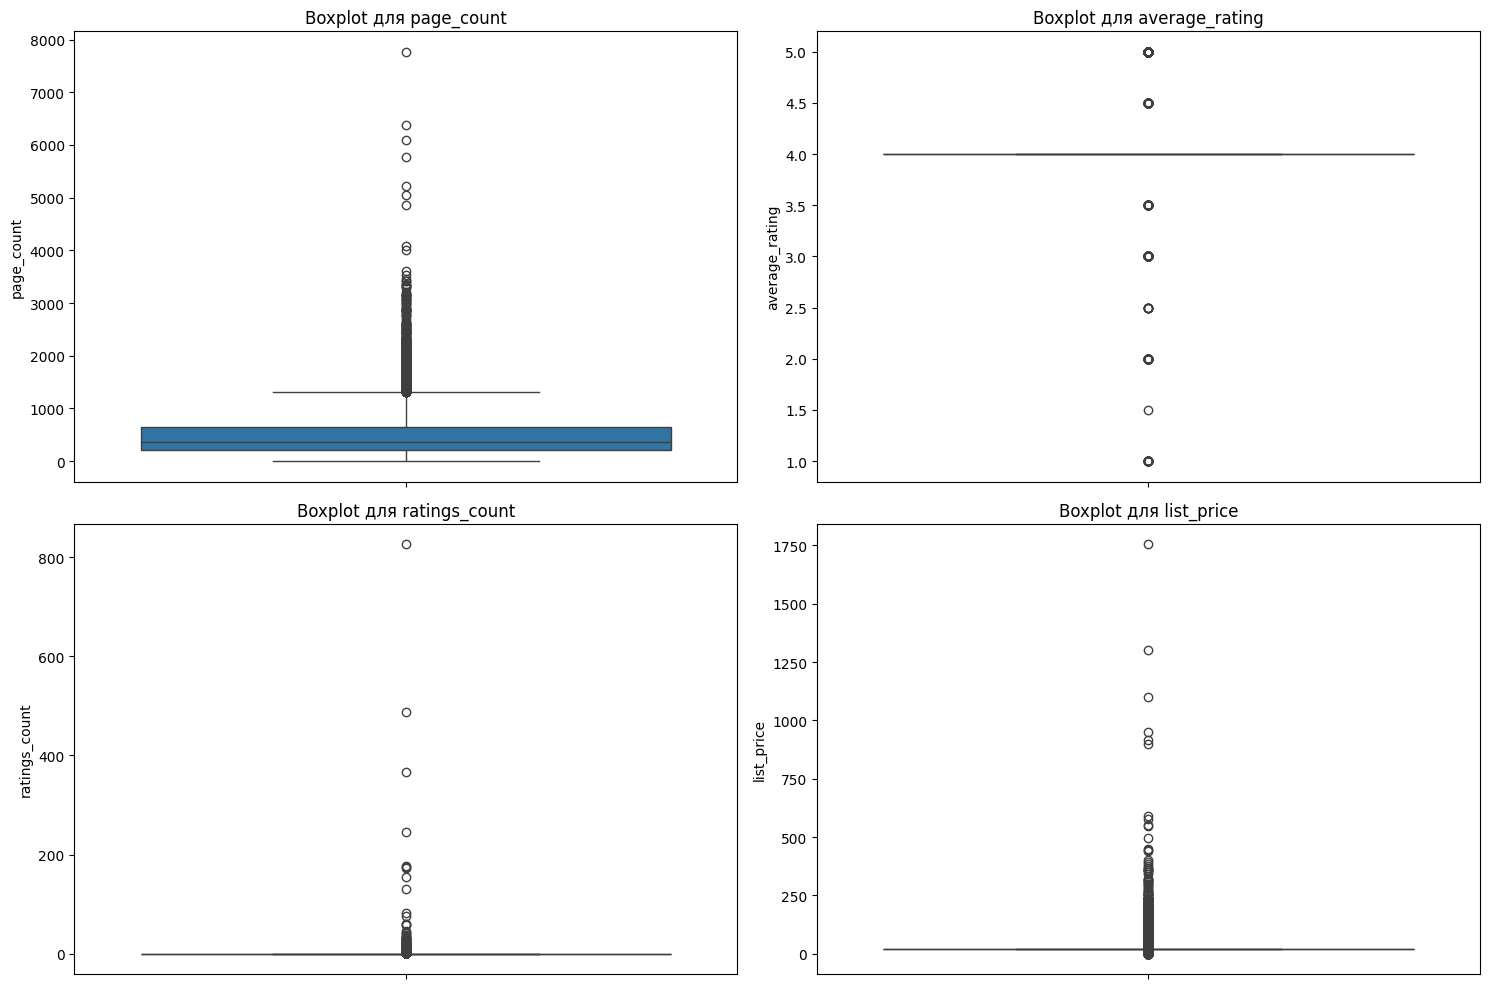

Выбросы в столбце 'page_count' обработаны с помощью IQR.
Выбросы в столбце 'average_rating' обработаны с помощью IQR.
Выбросы в столбце 'ratings_count' обработаны с помощью IQR.
Выбросы в столбце 'list_price' обработаны с помощью IQR.

=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===
                   count unique  \
book_id            15147  15147   
title              15147  13144   
subtitle           15147   5282   
authors            15147   9025   
publisher          15147   2001   
published_date     15147   4144   
description        15147   7981   
page_count       15147.0    NaN   
categories         15147   1829   
average_rating   15147.0    NaN   
ratings_count    15147.0    NaN   
language           15147     37   
preview_link       15147  15147   
info_link          15147  15147   
isbn_13          15147.0    NaN   
isbn_10            15147   7115   
list_price       15147.0    NaN   
currency           15147      1   
buyable            15147      2   
search_category    15147    149 

In [12]:
# 1. Пропущенные значения
print("=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ===")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
print(missing_df[missing_df['Количество пропусков'] > 0])

# Визуализация пропусков
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Карта пропущенных значений', fontsize=16)
plt.show()

# Стратегия заполнения пропусков
print("\n=== СТРАТЕГИЯ ОБРАБОТКИ ПРОПУСКОВ ===")

# Для числовых столбцов заполняем медианой
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Заполнен столбец '{col}' медианой: {median_value}")

# Для категориальных столбцов заполняем модой или специфичными значениями
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        if col in ['subtitle', 'description']:
            df[col].fillna('Не указано', inplace=True)
        elif col == 'average_rating': # This column is float, should be in numeric_cols
            df[col].fillna(0, inplace=True)
        elif col == 'ratings_count': # This column is int, should be in numeric_cols
            df[col].fillna(0, inplace=True)
        else:
            mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
            df[col].fillna(mode_value, inplace=True)
        print(f"Заполнен столбец '{col}'")

# 2. Дубликаты
print("\n=== ДУБЛИКАТЫ ===")
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены")
else:
    print("Полных дубликатов не найдено")

# Проверка дубликатов по ключевым полям
potential_duplicates = df.duplicated(subset=['title', 'authors', 'published_date']).sum()
print(f"Потенциальных дубликатов по title/authors/date: {potential_duplicates}")

# 3. Выбросы
print("\n=== ВЫБРОСЫ ===")
numeric_cols_for_outliers = ['page_count', 'average_rating', 'ratings_count', 'list_price']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_for_outliers, 1):
    plt.subplot(2, 2, i)
    if col in df.columns and df[col].dtype in [np.float64, np.int64]:
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot для {col}')
plt.tight_layout()
plt.show()

# Обработка выбросов с помощью z-score (тут был IQR)
for col in numeric_cols_for_outliers:
    if col in df.columns:
        # Ensure the column is numeric before calculating quartiles
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Заменяем выбросы
            df.loc[df[col] < lower_bound, col] = lower_bound
            df.loc[df[col] > upper_bound, col] = upper_bound
            print(f"Выбросы в столбце '{col}' обработаны с помощью IQR.")

# 4. Статистики данных
print("\n=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")
print(df.describe(include='all').T)

# Подсчёт уникальных значений
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} уникальных значений")

# Частота категорий для ключевых столбцов
key_categorical_cols = ['categories', 'language', 'publisher', 'search_category']
for col in key_categorical_cols:
    if col in df.columns:
        print(f"\nЧастота категорий для '{col}':")
        print(df[col].value_counts().head(10))

# Корреляционный анализ
print("\n=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    correlation_matrix = numeric_df.corr()
    print("Матрица корреляций:")
    print(correlation_matrix)

C. Визуализация данных


=== ВИЗУАЛИЗАЦИЯ ДАННЫХ ===


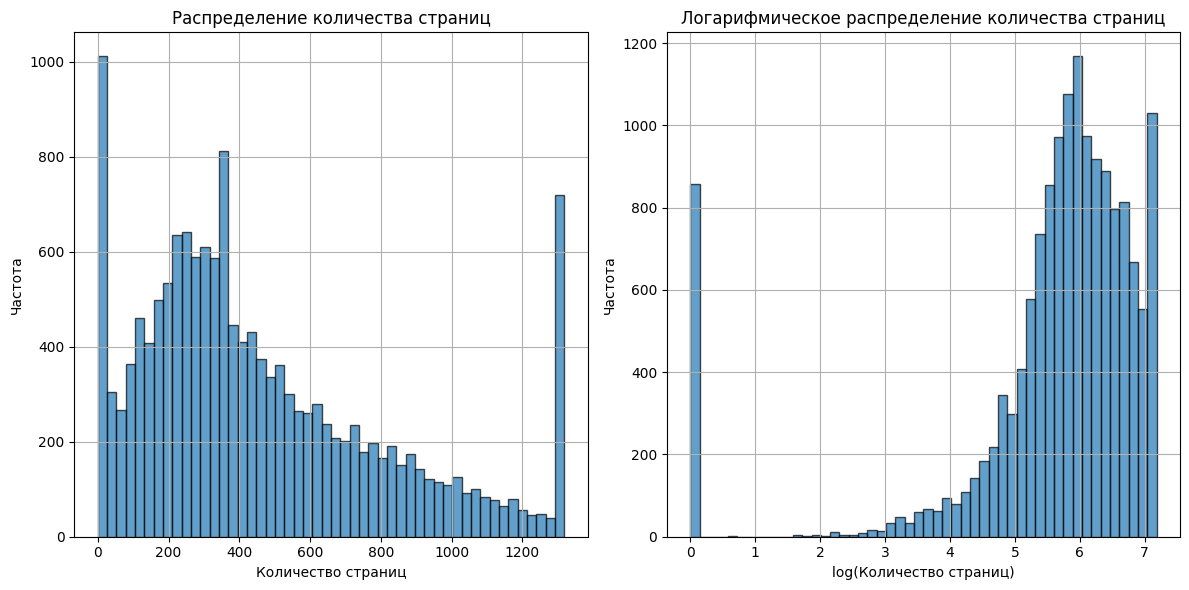

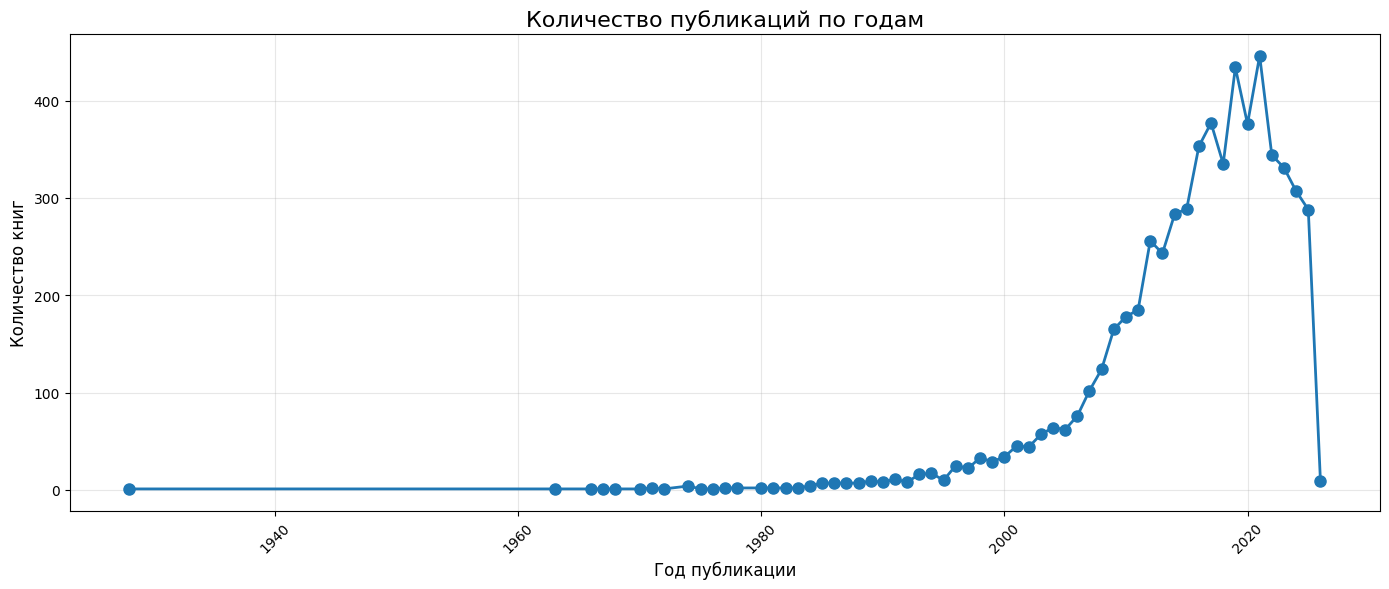

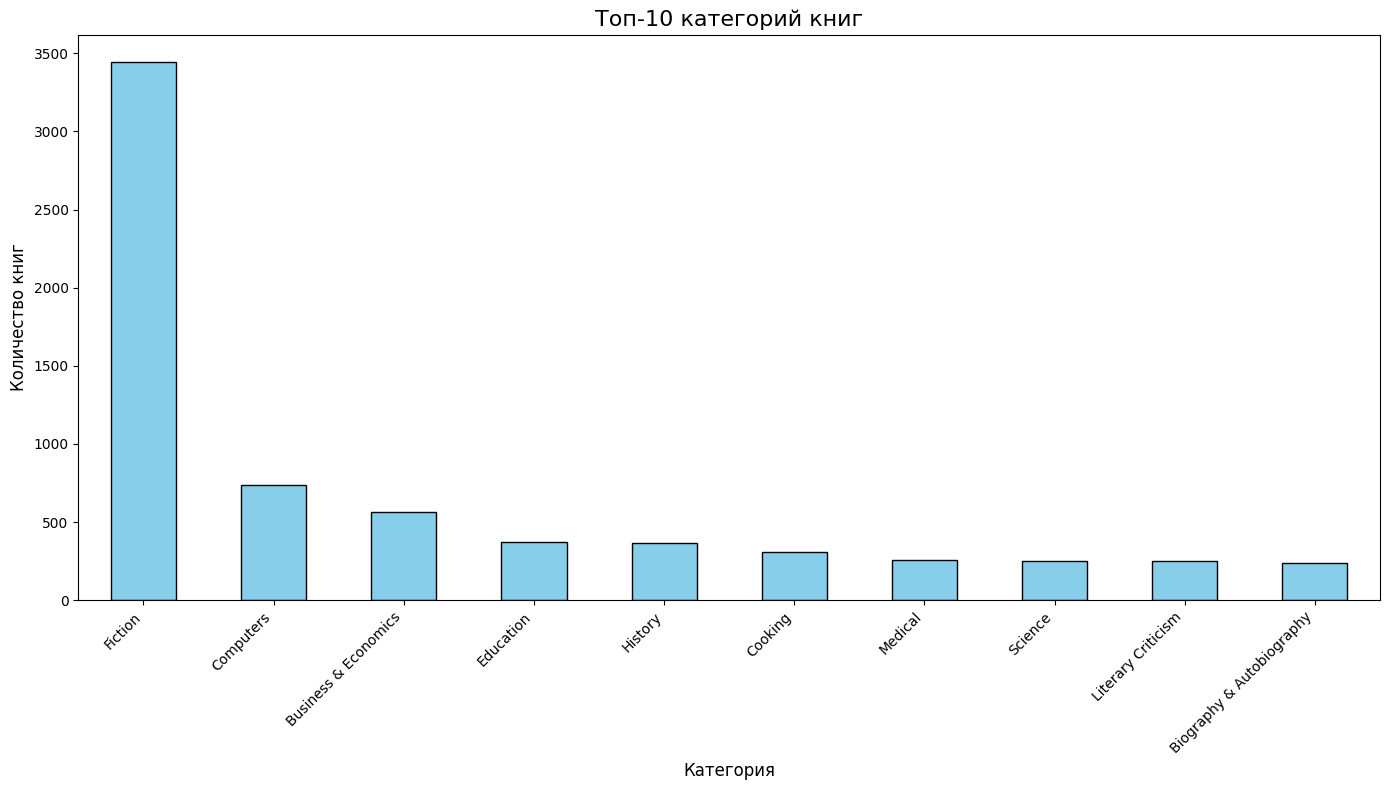

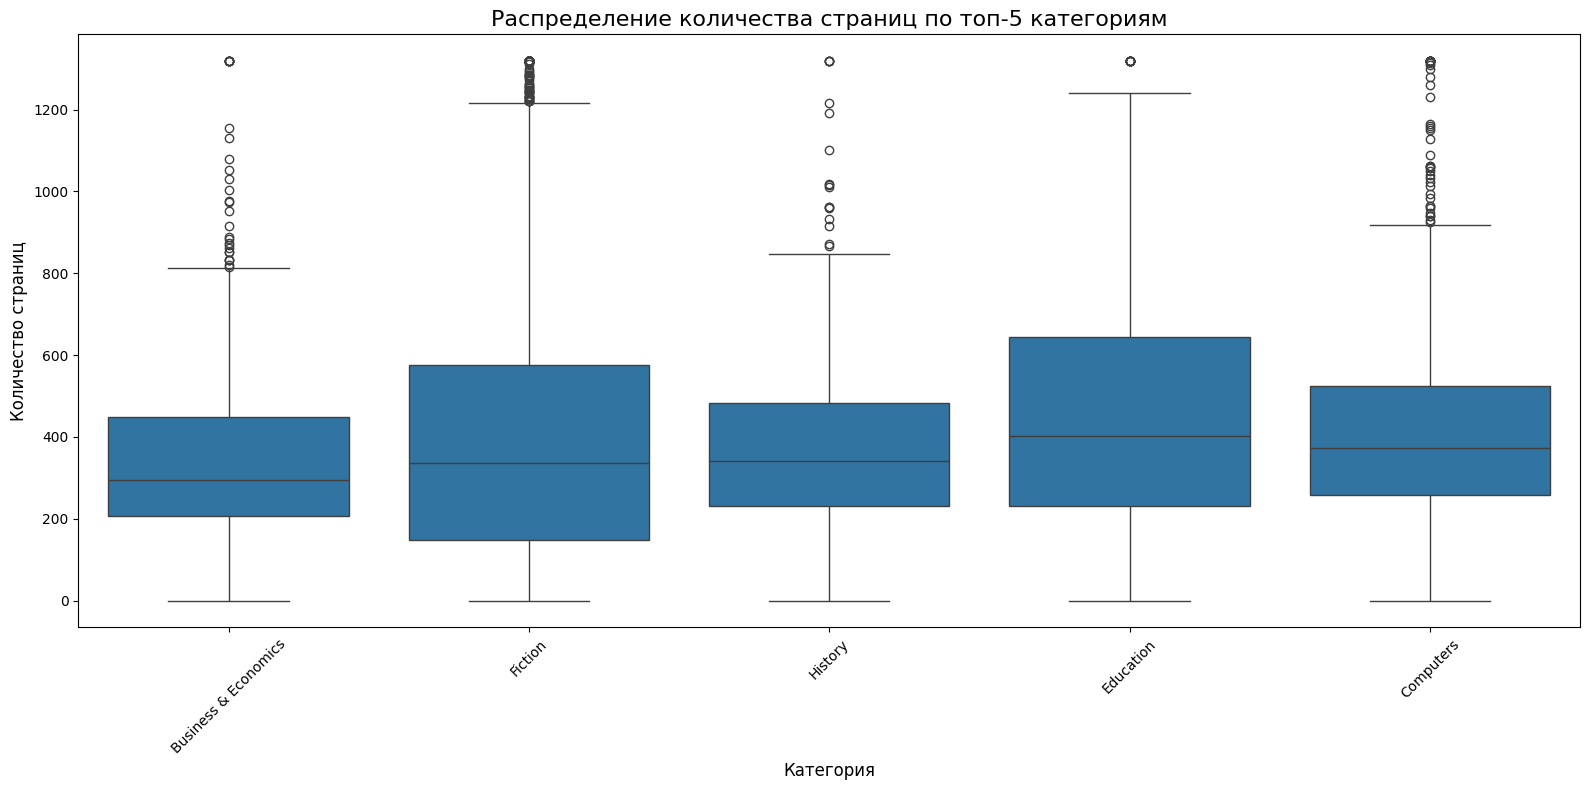

Недостаточно изменяющихся числовых признаков для построения информативной тепловой карты корреляций.
Изменяющиеся признаки: ['page_count']


In [13]:
print("\n=== ВИЗУАЛИЗАЦИЯ ДАННЫХ ===")

# 1. Гистограмма распределения page_count
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['page_count'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение количества страниц')
plt.xlabel('Количество страниц')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
df['page_count'].apply(np.log1p).hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Логарифмическое распределение количества страниц')
plt.xlabel('log(Количество страниц)')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# 2. Линейный график публикаций по годам
df['year'] = pd.to_datetime(df['published_date'], errors='coerce').dt.year
yearly_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
yearly_counts.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Количество публикаций по годам', fontsize=16)
plt.xlabel('Год публикации', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Столбчатая диаграмма топ-10 категорий
plt.figure(figsize=(14, 8))
top_categories = df['categories'].value_counts().head(10)
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Топ-10 категорий книг', fontsize=16)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество книг', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Boxplot для количества страниц по категориям (вместо рейтинга)
# average_rating стал константным после заполнения пропусков, поэтому используем page_count для более информативного графика
plt.figure(figsize=(16, 8))
top_5_categories = df['categories'].value_counts().head(5).index
filtered_df = df[df['categories'].isin(top_5_categories)]
sns.boxplot(x='categories', y='page_count', data=filtered_df) # Изменено y на page_count
plt.title('Распределение количества страниц по топ-5 категориям', fontsize=16) # Обновлен заголовок
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество страниц', fontsize=12) # Обновлена подпись оси y
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Heatmap корреляций (только для изменяющихся числовых признаков)
# average_rating, ratings_count и list_price стали константными после заполнения пропусков,
# поэтому для корректной тепловой карты нужно использовать только признаки с вариацией.
plt.figure(figsize=(12, 10))
# Фильтруем числовые столбцы, чтобы включить только те, у которых есть вариация (std > 0)
varying_numeric_cols = [col for col in ['page_count', 'average_rating', 'ratings_count', 'list_price'] if df[col].std() > 0]

if len(varying_numeric_cols) > 1: # Строим тепловую карту только если есть более одного изменяющегося признака
    numeric_df_varying = df[varying_numeric_cols].dropna()
    correlation_matrix = numeric_df_varying.corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Матрица корреляций изменяющихся числовых признаков', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно изменяющихся числовых признаков для построения информативной тепловой карты корреляций.")
    print(f"Изменяющиеся признаки: {varying_numeric_cols}")
    plt.close() # Закрываем пустой figure, чтобы он не отображался


D. Группировки и агрегации


=== ГРУППИРОВКИ И АГРЕГАЦИИ ===
1. Средние значения по категориям:
                        page_count              average_rating         \
                              mean median count           mean median   
categories                                                              
1941                           0.0    0.0     1            4.0    4.0   
35mm cameras                   0.0    0.0     1            4.0    4.0   
4-H clubs                    506.0  506.0     1            4.0    4.0   
ANTIQUES & COLLECTIBLES      299.0  299.0     1            4.0    4.0   
Abbreviations, French        310.0  310.0     1            4.0    4.0   
Ability                      128.0  128.0     1            4.0    4.0   
Aboriginal Australians       270.0  270.0     1            4.0    4.0   
Absolution                   642.0  642.0     1            4.0    4.0   
Abused wives                   0.0    0.0     1            4.0    4.0   
Academic freedom             129.0  129.0     1         

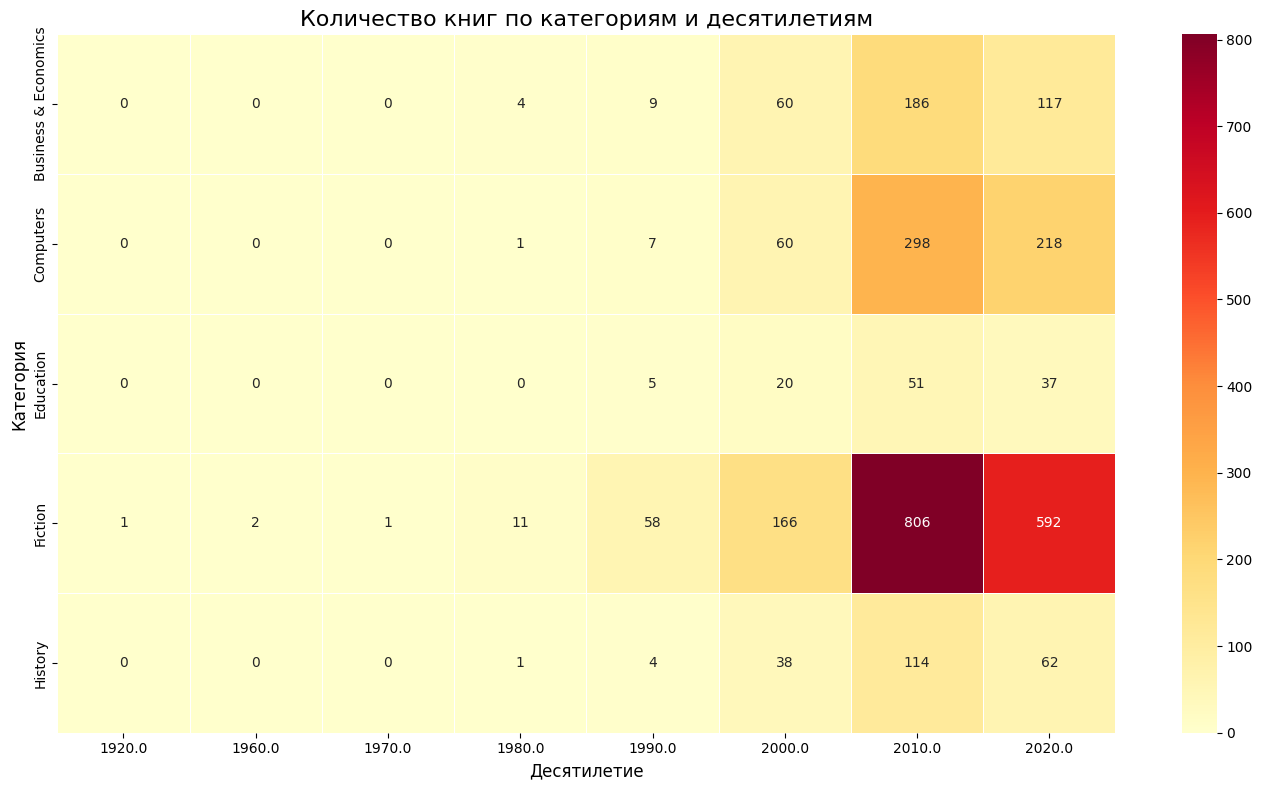


Обработанные данные сохранены в 'processed_google_books.csv'

ИТОГОВЫЙ ОТЧЕТ ПО АНАЛИЗУ ДАННЫХ
Исходный размер: (15147, 21)
Обработанный размер: (15147, 23)
Уникальных категорий: 1829
Уникальных авторов: 9025
Диапазон годов публикации: 1928.0 - 2026.0
Средний рейтинг: 4.00
Среднее количество страниц: 460.94
Средняя цена: $19.00


In [14]:
print("\n=== ГРУППИРОВКИ И АГРЕГАЦИИ ===")

# 1. Группировка по категориям: средние значения
print("1. Средние значения по категориям:")
category_stats = df.groupby('categories').agg({
    'page_count': ['mean', 'median', 'count'],
    'average_rating': ['mean', 'median'],
    'list_price': ['mean', 'median', 'sum']
}).round(2)
print(category_stats.head(10))

# 2. Группировка по году публикации
print("\n2. Статистики по годам публикации:")
yearly_stats = df.groupby('year').agg({
    'book_id': 'count',
    'page_count': 'mean',
    'average_rating': 'mean',
    'list_price': 'mean'
}).round(2).sort_values('year')
yearly_stats.columns = ['Количество книг', 'Ср. страниц', 'Ср. рейтинг', 'Ср. цена']
print(yearly_stats.head(10))

# 3. Группировка по языку
print("\n3. Статистики по языкам:")
language_stats = df.groupby('language').agg({
    'book_id': 'count',
    'average_rating': 'mean',
    'page_count': 'mean',
    'list_price': 'mean'
}).round(2).sort_values('book_id', ascending=False)
language_stats.columns = ['Количество', 'Ср. рейтинг', 'Ср. страниц', 'Ср. цена']
print(language_stats)

# 4. Группировка по издателям (топ-10)
print("\n4. Топ-10 издателей по количеству книг:")
publisher_stats = df.groupby('publisher').agg({
    'book_id': 'count',
    'average_rating': 'mean',
    'list_price': 'mean'
}).round(2).sort_values('book_id', ascending=False).head(10)
publisher_stats.columns = ['Количество книг', 'Ср. рейтинг', 'Ср. цена']
print(publisher_stats)

# 5. Pivot таблица: категории vs год
print("\n5. Pivot таблица: Количество книг по категориям и годам")
# Создаем десятилетие для лучшей группировки
df['decade'] = (df['year'] // 10) * 10
pivot_table = pd.pivot_table(
    df[df['categories'].isin(top_5_categories)],
    values='book_id',
    index='categories',
    columns='decade',
    aggfunc='count',
    fill_value=0
)
print(pivot_table)

# Визуализация pivot таблицы
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlOrRd', linewidths=0.5)
plt.title('Количество книг по категориям и десятилетиям', fontsize=16)
plt.xlabel('Десятилетие', fontsize=12)
plt.ylabel('Категория', fontsize=12)
plt.tight_layout()
plt.show()

# Сохранение обработанных данных
df.to_csv('processed_google_books.csv', index=False)
print("\nОбработанные данные сохранены в 'processed_google_books.csv'")

# Итоговый отчет
print("\n" + "="*50)
print("ИТОГОВЫЙ ОТЧЕТ ПО АНАЛИЗУ ДАННЫХ")
print("="*50)
print(f"Исходный размер: {pd.read_csv('google_books_dataset.csv').shape}")
print(f"Обработанный размер: {df.shape}")
print(f"Уникальных категорий: {df['categories'].nunique()}")
print(f"Уникальных авторов: {df['authors'].nunique()}")
print(f"Диапазон годов публикации: {df['year'].min()} - {df['year'].max()}")
print(f"Средний рейтинг: {df['average_rating'].mean():.2f}")
print(f"Среднее количество страниц: {df['page_count'].mean():.2f}")
print(f"Средняя цена: ${df['list_price'].mean():.2f}")